In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from material_params import CalciteUpper, Quartz, Sapphire, CalciteLower

plt.rcParams.update({'mathtext.default': 'regular' })
plt.rcParams.update({'font.family': 'Arial' })

from matplotlib import interactive
interactive(True)
%matplotlib ipympl

In [2]:
quartz = CalciteUpper()

In [3]:
def coefficients(kx, ky, k0, eps_ord, eps_ext, theta):
    first_coeff = eps_ord * np.sin(theta)**2. + eps_ext * np.cos(theta)**2.

    second_coeff = 2.j * kx * np.cos(theta) * np.sin(theta) * (eps_ord - eps_ext)

    third_coeff = k0**2. - ky**2. * eps_ord - (kx**2. * (eps_ord * np.cos(theta)**2. + eps_ext * np.sin(theta)**2.))

    return first_coeff, second_coeff, third_coeff

In [4]:
frequency = 1470
eps_prism = 11.56
k0 = 2 * np.pi * frequency * np.sqrt(eps_prism)

kx = np.linspace(-20 * k0, 20 * k0, 100)
ky = np.linspace(-20 * k0, 20 * k0, 100)
kx, ky = np.meshgrid(kx, ky)
our_tensor = quartz.fetch_permittivity_tensor_for_freq(frequency)
eps_ord, eps_ext = our_tensor[0,0].numpy().real, our_tensor[2,2].numpy().real

theta = np.radians(66.7)

kz_sol_1 = np.empty(kx.shape, dtype=complex)
kz_sol_2 = np.empty(kx.shape, dtype=complex)

# Iterate over the kx, ky arrays
for i in range(kx.shape[0]):
    for j in range(ky.shape[1]):
        roots = np.roots(coefficients(kx[i, j], ky[i, j], k0, eps_ord, eps_ext, theta))
        kz_sol_1[i, j] = roots[0]
        kz_sol_2[i, j] = roots[1]
        # if kx[i, j] < 0:
        #     # If kx is negative, multiply kz by -1
        #     kz_sol_1[i, j] = roots[1]
        #     kz_sol_2[i, j] = roots[0]
        # else:
        #     kz_sol_1[i, j] = roots[0]
        #     kz_sol_2[i, j] = roots[1]

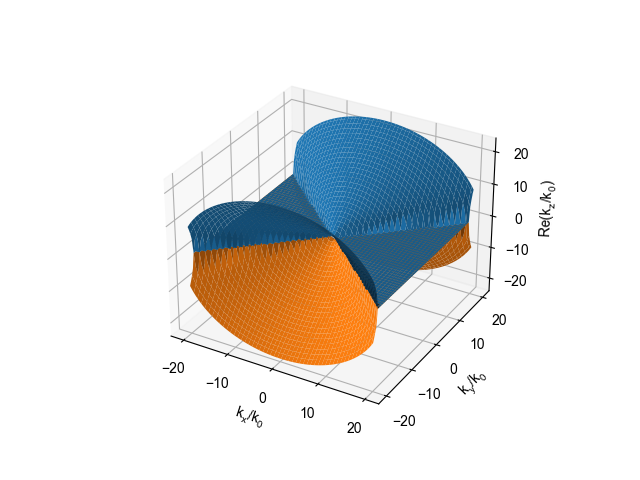

In [5]:
# Plot the fitted kz surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kx/k0, ky/k0, kz_sol_1.real/k0)
ax.plot_surface(kx/k0, ky/k0, kz_sol_2.real/k0)


ax.set_xlabel(r'$k_x/k_0$')
ax.set_ylabel(r'$k_y/k_0$')
ax.set_zlabel(r'Re($k_z/k_0$)')

plt.show()

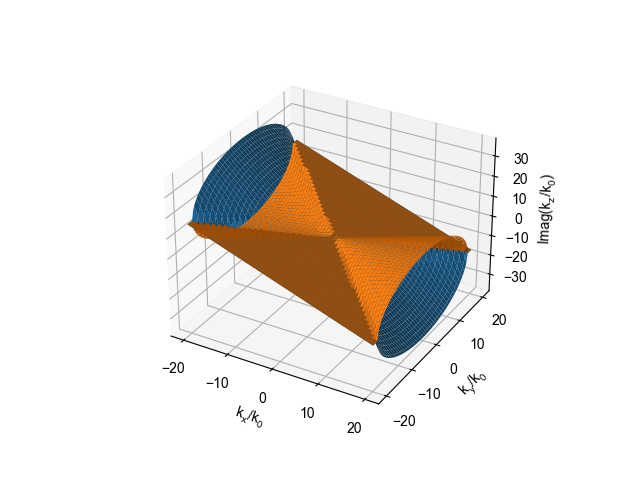

In [6]:
# Plot the fitted kz surface
fig = plt.figure()

ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_surface(kx/k0, ky/k0, kz_sol_1.imag/k0)
ax2.plot_surface(kx/k0, ky/k0, kz_sol_2.imag/k0)


ax2.set_xlabel(r'$k_x/k_0$')
ax2.set_ylabel(r'$k_y/k_0$')
ax2.set_zlabel(r'Imag($k_z/k_0$)')
plt.show()

In [4]:
calcite = CalciteUpper(freq_min= 1400, freq_max = 1600)

In [5]:
ext, ord = calcite.permittivity_fetch()

In [6]:
def plot_permittivity(material, eps_ext, eps_ord):
    plt.rcParams.update(
        {
            "font.size": 20,
            "axes.labelsize": 20,
            "axes.titlesize": 22,
            "xtick.labelsize": 20,
            "ytick.labelsize": 20,
            "legend.fontsize": 17,
        }
    )

    fig, ax = plt.subplots(
        figsize=(6, 4)
    )

    # Plot real part of permittivity
    ax.plot(
        material.frequency,
        tf.math.real(eps_ext),
        label=r"$\mathrm{Re}(\varepsilon_\mathrm{ext})$",
    )
    ax.plot(
        material.frequency,
        tf.math.real(eps_ord),
        label=r"$\mathrm{Re}(\varepsilon_\mathrm{ord})$",
    )
    ax.axhline(y=0, color="black", linewidth=1)
    ax.set(ylabel=r"$\mathrm{Re}(\epsilon)$")
    ax.legend()
    ax.set_xlabel("Wavenumber (cm$^{-1}$)")
    plt.show()


c:\Users\2719913C\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


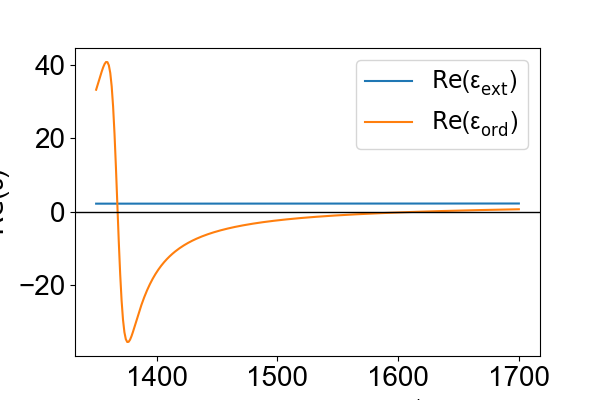

In [7]:
plot_permittivity(quartz, ext, ord)

In [15]:
quartz = Quartz()

In [20]:
tensor = quartz.fetch_permittivity_tensor_for_freq(497)

In [21]:
tensor

<tf.Tensor: shape=(3, 3), dtype=complex64, numpy=
array([[ -0.72690165+0.1600409j,   0.        +0.j       ,
          0.        +0.j       ],
       [  0.        +0.j       ,  -0.72690165+0.1600409j,
          0.        +0.j       ],
       [  0.        +0.j       ,   0.        +0.j       ,
        -16.99342   +3.865081j ]], dtype=complex64)>

In [12]:
calcite = CalciteUpper()
calcite_tensor = calcite.fetch_permittivity_tensor_for_freq(1552)
calcite_tensor

<tf.Tensor: shape=(3, 3), dtype=complex64, numpy=
array([[0.04203881+0.09492985j, 0.        +0.j        ,
        0.        +0.j        ],
       [0.        +0.j        , 0.04203881+0.09492985j,
        0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        2.2829335 +0.00052507j]], dtype=complex64)>

In [33]:
sapphire = Sapphire()
sapphire_tensor = sapphire.fetch_permittivity_tensor_for_freq(505)
sapphire_tensor

<tf.Tensor: shape=(3, 3), dtype=complex64, numpy=
array([[ 8.876158 +0.2968004j ,  0.       +0.j        ,
         0.       +0.j        ],
       [ 0.       +0.j        ,  8.876158 +0.2968004j ,
         0.       +0.j        ],
       [ 0.       +0.j        ,  0.       +0.j        ,
        -1.1660311+0.13751653j]], dtype=complex64)>

In [34]:
tensor

<tf.Tensor: shape=(3, 3), dtype=complex64, numpy=
array([[ -0.72690165+0.1600409j,   0.        +0.j       ,
          0.        +0.j       ],
       [  0.        +0.j       ,  -0.72690165+0.1600409j,
          0.        +0.j       ],
       [  0.        +0.j       ,   0.        +0.j       ,
        -16.99342   +3.865081j ]], dtype=complex64)>